In [ ]:
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('Incomes.csv')

These are just my basic imports that I will need to build the model and I'm using pandas to read in the file

In [64]:
filtered_data = df.drop(columns=['fnlwgt', 'education', 'capital.gain', 'capital.loss', 'native.country','workclass','relationship','marital.status'])
filtered_data = filtered_data.replace('?', pd.NA).dropna()
filtered_data.to_csv('filtered_incomes.csv', index=False)
X = filtered_data[['age', 'education.num', 'hours.per.week']]
Y = filtered_data['income']

In this code block I am condensing the data as much as I can because I want the model to be as efficient as possible and a lot of these fields aren't necessary for the models learning to build the prediction.

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=258)

This is just to seperate my test data from my training data so that my model can be trained and tested appropriately, I am splitting it 80% training and 20% testing data

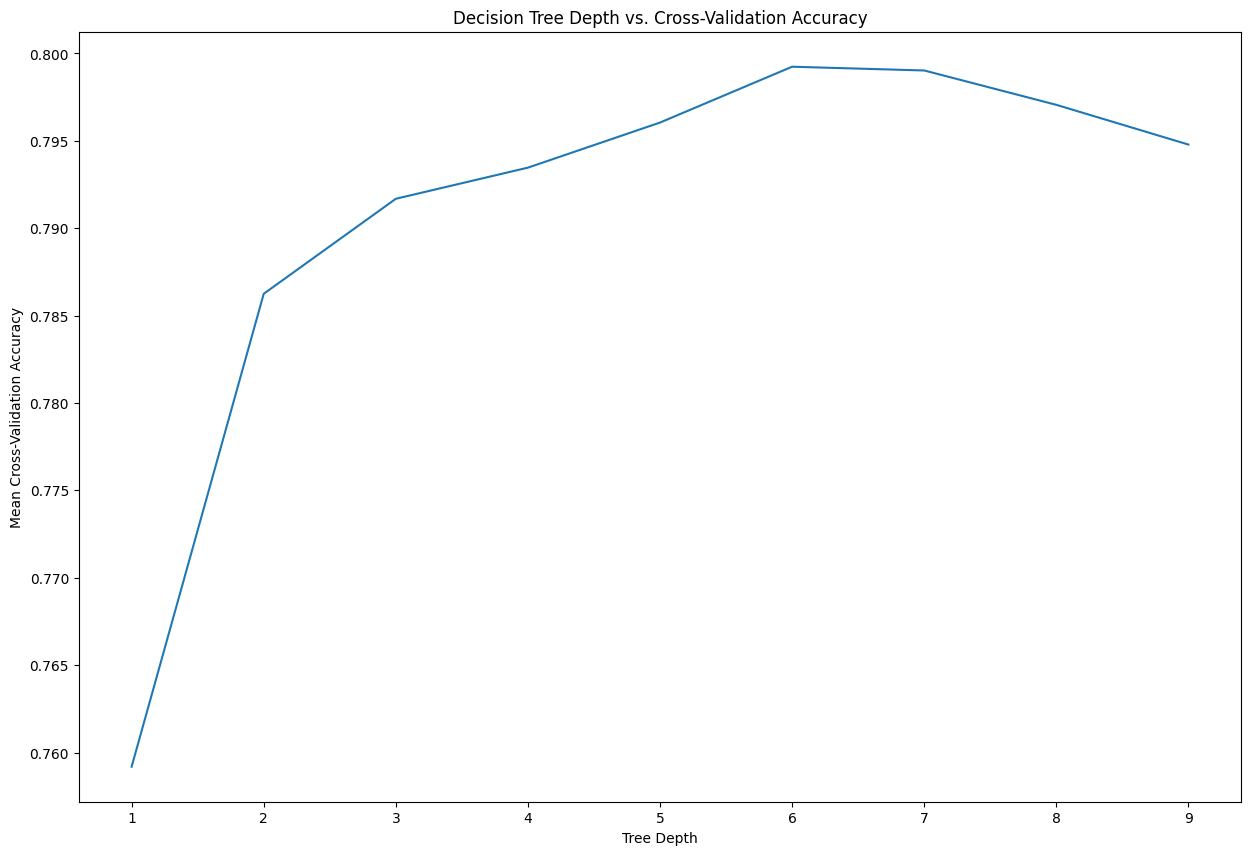

In [54]:
# Define a range of depths to evaluate
depths = range(1, 10)  # Test depths from 1 to 20
mean_scores = []

# Evaluate each depth using cross-validation
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(decision_tree, X, Y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_scores.append(scores.mean())  # Store the mean accuracy for each depth

# Plot the results
plt.figure(figsize=(15, 10))
plt.plot(depths, mean_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Decision Tree Depth vs. Cross-Validation Accuracy')
plt.show()

This code block was obtained from ChatGPT and it's used to plot the graph of the decision tree depth vs cross-validation accuracy to help figure out what the best depth for the decision tree is. This is helpful as it will give me the best and most accurate model for my data. Based off of the calculations it seems that 6 nodes deep is the where the model will get its best accuracy rating so I will go with this for my model. This is a nice graph to have available when building the model as it nicely shows what each depth is going to be like accuracy wise and this saves me a lot of time when building it as now I don't have to go and manually test it

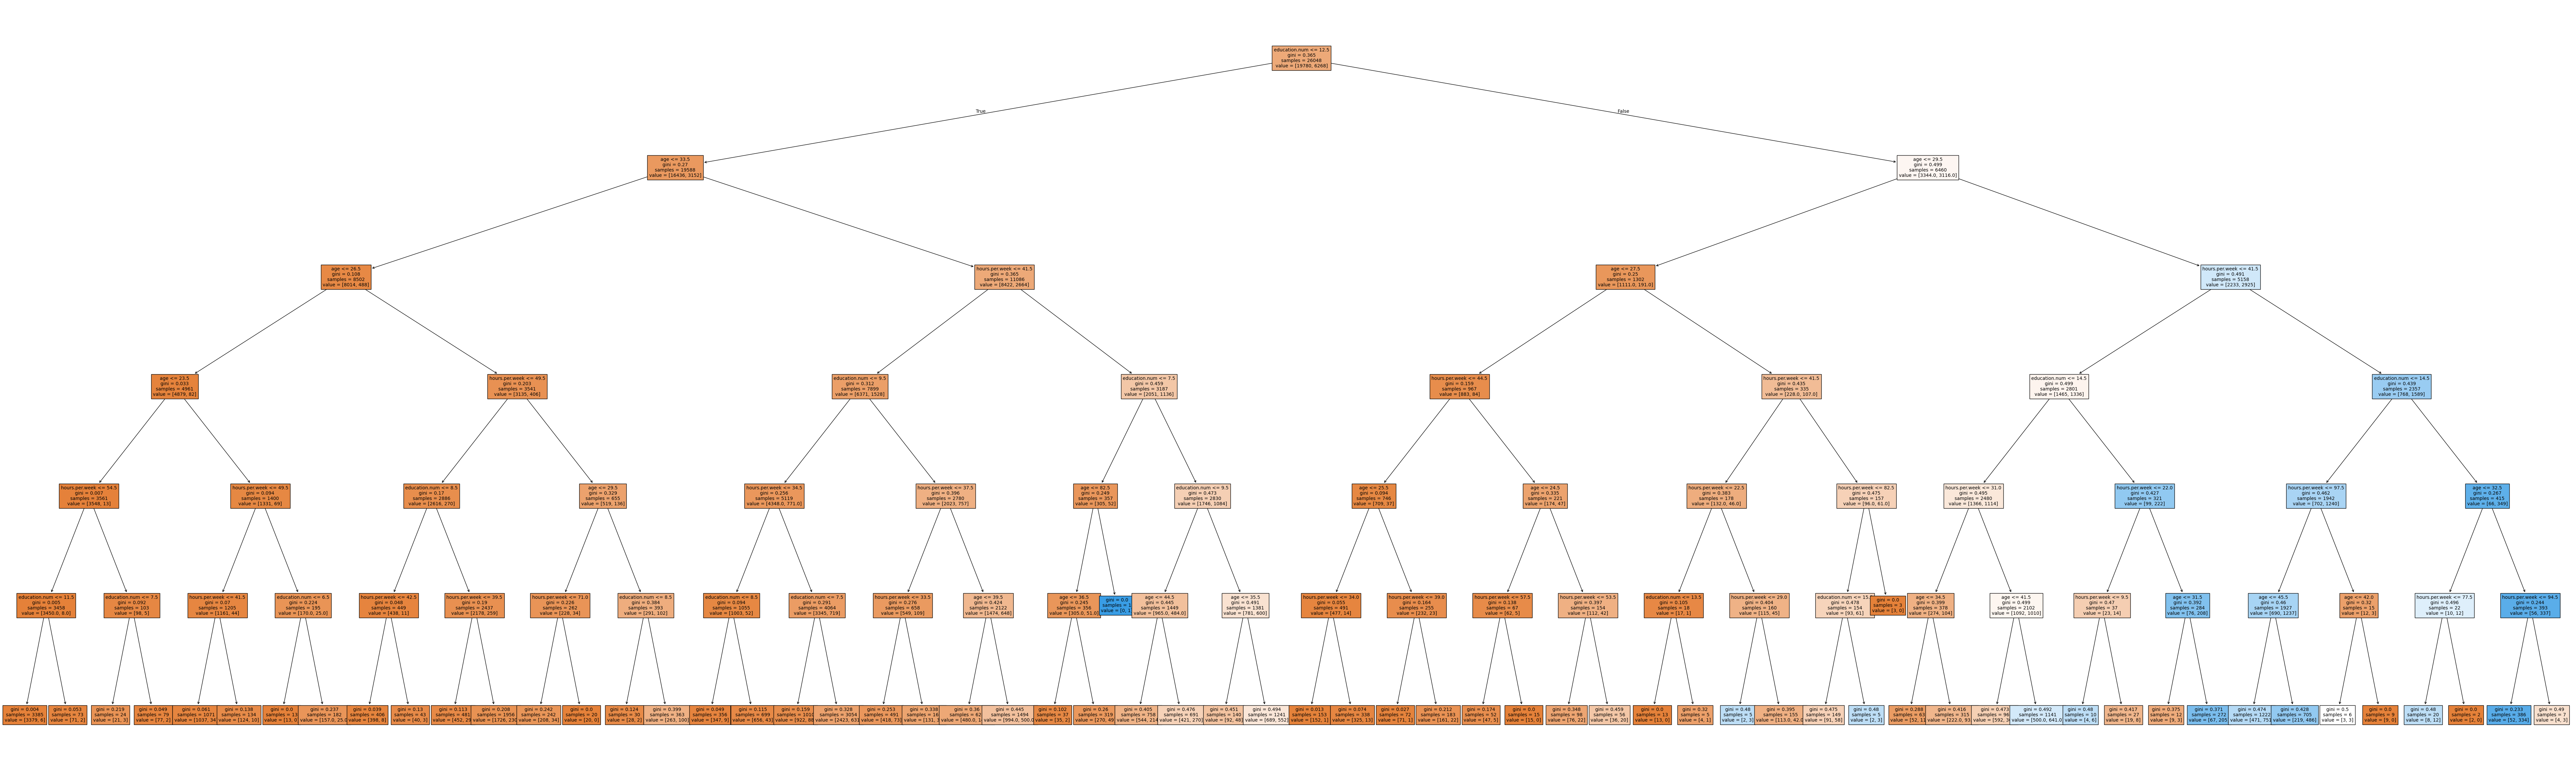

In [55]:
decision_tree = DecisionTreeClassifier(max_depth=6) # I obtained class_weight="balanced" from ChatGPT and it's used to handle the imbalanced dataset
decision_tree = decision_tree.fit(x_train, y_train)

plt.figure(figsize=(100, 30)) # This line is used to set the size of the decision tree plot to make it more visible and readable
tree.plot_tree(decision_tree, feature_names=['age', 'education.num', 'hours.per.week'], filled=True, fontsize=10)
plt.show()

This is the decision tree that my model has built based off of the parameters that I have given it, it isn't too readable here as it goes quite deep but I have included a png of it in the folder so it is easier to view.

In [56]:
decision_tree.fit(x_train, y_train)

predictions = decision_tree.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100  

print('The accuracy of the decision tree model is: ', accuracy_percentage, '%')

The accuracy of the decision tree model is:  80.08598188238906 %


This is using Sci-Kit learns metric to calculate the accuracy score of my model and it is at 80% which is quite good for a model like this as it wasn't the biggest dataset at 32000 rows.

In [57]:
# Example new sample data
example_prediction = pd.DataFrame({'age': [55], 'education.num': [13], 'hours.per.week': [40]}) # I obtained this line from ChatGPT and it's used to create new sample data for a prediction

# Make a prediction
prediction = decision_tree.predict(example_prediction)
if prediction[0] == '<=50K':
    print('The predicted income for this person is less than or equal to 50K')
else:
    print('The predicted income for this person is greater than 50K')

The predicted income for this person is greater than 50K


This code block is where I can enter sample data to make a prediction using the model that I built and it will output whether the model thinks that they will make over or under 50 grand a year

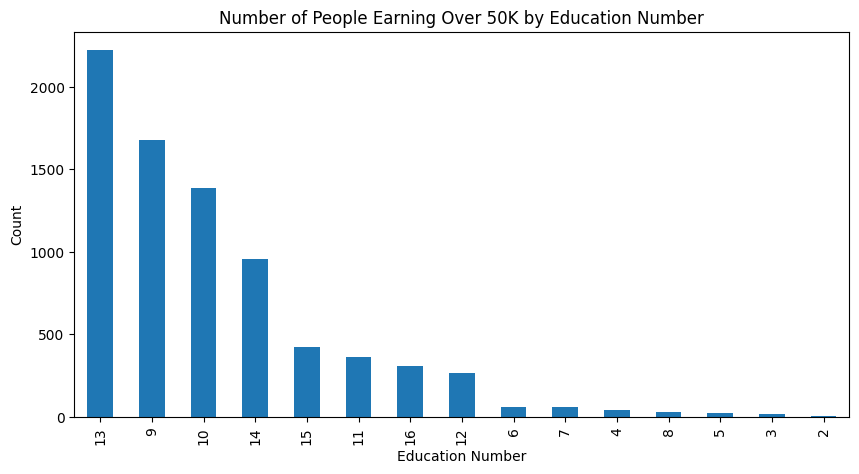

In [58]:
over_50k = filtered_data[filtered_data['income'] == '>50K']
education_counts = over_50k['education.num'].value_counts()

plt.figure(figsize=(10, 5))
education_counts.plot(kind='bar')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.title('Number of People Earning Over 50K by Education Number')
plt.show()

Education Number to Level Guide:

1 -> Preschool

2 -> 1st-4th

3 -> 5th-6th

4 -> 7th-8th

5 -> 9th

6 -> 10th

7 -> 11th

8 -> 12th

9 -> HS-grad

10 -> Some-college

11 -> Assoc-voc (This is an associate's degree in vocational studies, typically used for a trade)

12 -> Assoc-acdm (This is an associate's degree in academic studies, it's the equivalent to a PLC here)

13 -> Bachelors

14 -> Masters

15 -> Prof-school (This is 'Professionals School' these are typically a longer degree such as medicine, law, doctor, dentistry, etc)

16 -> Doctorate

I created this graph as I wanted to see what education level had the largest amount of over 50k a year earners, however I believe this graph might not be the best representation for the data as a lot more people will have a bachelors than a masters degree and this graph just counts them

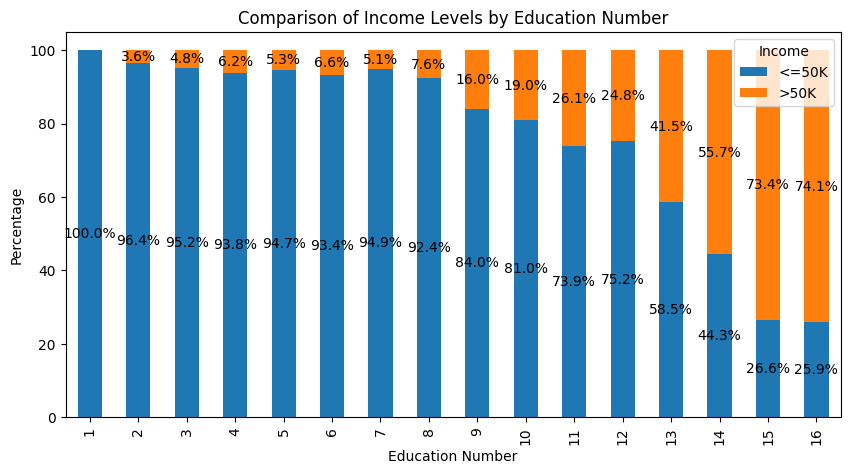

In [61]:
# Group by education number and income, then count occurrences
education_income_counts = filtered_data.groupby(['education.num', 'income']).size().unstack()

# Calculate percentages for each education.num
education_income_percentage = education_income_counts.div(education_income_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart with percentages
ax = education_income_percentage.plot(kind='bar', stacked=True, figsize=(10, 5))

# Add labels and title
plt.xlabel('Education Number')
plt.ylabel('Percentage')
plt.title('Comparison of Income Levels by Education Number')
plt.legend(title='Income')

# Add percentage labels directly on bars
for container in ax.containers:  # Iterate over the bar containers
    for bar in container:  # Iterate over each bar
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(
                x, y, 
                f'{height:.1f}%',  # Display the percentage
                ha='center', 
                va='center'
            )

# Display the plot
plt.show()


This code block was generated by chatGPT as I was having trouble doing this myself. This is a much better representation of the data that I was looking for, as we can see in this graph, the relationship between having a higher level of degree and earning over 50k a year is fairly linear. It does surprise me however how nearly 60% of people with a bachelors degree and 45% of people with a masters are earning under 50k a year. I assumed this would have been a bit lower.

# What did we learn from this?

From building the model of this dataset I learned a few things. I was surprised to learn that percentages of masters and bachelors degree students were earning over 50k a year was 41% and 55%, I know this dataset is from 1994 but this still surprised me as especially back then those types of degrees would hold a lot of weight even more so than they do now. Another interesting thing that I learned is that there wasnt really a difference in the percentage of prof school and doctorate students. I am also very surprised to learn that 25% of doctorate holders were earning under 50k a year, I was expecting this number to be more around the 5/10% mark.

# Data Overview

This data was obtained from Kaggle from this link (https://www.kaggle.com/datasets/uciml/adult-census-income). Despite this dataset coming from Kaggle, it is actually data taken from the U.S census in 1994. This dataset outlines the basic information about people such as their age, education level, occupation, marital status, gender and most importantly income and the data has about 32,000 rows.

# Pre Processing
There was a bit of pre-processing for this dataset. The first issue I found when I was manually looking through the data was how there were a lot of rows that contained '?' as the values for some of the columns. I searched the CSV file to see how many of these there were and there were about 2000 rows where this was the case. I decided to convert these rows to a null value so I could drop them and I was left with roughly 30,000 rows which I still think is sufficient to build this model. The next thing that I did to process the data was to drop the unnecessary columns for the model so I created a new CSV with the updated data that I would need so I could keep track of what fields were in my filtered data.

# Data Understanding
I now have a good understanding of the dataset compared to when I began writing this model. I had to do some reearch into the different education numbers and what each of them meant as this was a large part of what my model was trained on. As this is an American dataset I had to learn what some of the educational levels were and then for my own understanding I wanted to get an idea what the equivalent would be here in Ireland. I also learned what 'fnlwgt' is, due to the amount of people in America they can't have every individual entry into the dataset so this column so they use sampling and this column is how many people they roughly think the row will apply to.

# Algorithm
For this model I implemented a decision tree model using Sci-Kit Learn's Decision Tree model, I used this model as its a binary result for my data as the person will either make under/equal to 50k or they will make above it. This model has a 80% accuracy rating which is quite good and would be a useful tool for people who maybe are looking to switch career and want to see what the averages of that career are bringing in monetarily or people who are maybe thinking about furthering their education and want to see how beneficial it would be for them to do monetarily.

# Technologies Used
I used a few different technologies whilst creating this model such as Pandas which allowed me to read in my dataset and then I used a few of Sci-Kit Learn's tools to build my Decision Tree model such as their accuracy score, cross val score, their train and test split and of course their decision tree model.


